In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [2]:
import os
import zipfile

In [3]:
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall("")

In [9]:
path = "train"

In [11]:
X = []
y = []

convert = lambda category : int(category == 'dog')

def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [12]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [13]:
import pickle

pickle.dump( X, open( "train_x", "wb" ) )
pickle.dump( y, open( "train_y", "wb" ) )

In [14]:
X = X/255.0

In [15]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 414s 21ms/sample - loss: 0.6123 - acc: 0.6682 - val_loss: 0.7594 - val_acc: 0.5998
Epoch 2/10
20000/20000 [==============================] - 364s 18ms/sample - loss: 0.5065 - acc: 0.7505 - val_loss: 0.9261 - val_acc: 0.5138
Epoch 3/10
20000/20000 [==============================] - 369s 18ms/sample - loss: 0.4440 - acc: 0.7919 - val_loss: 0.7859 - val_acc: 0.6064
Epoch 4/10
20000/20000 [==============================] - 360s 18ms/sample - loss: 0.3827 - acc: 0.8239 - val_loss: 0.5731 - val_acc: 0.7436
Epoch 5/10
20000/20000 [==============================] - 357s 18ms/sample - loss: 0.3218 - acc: 0.8594 - val_loss: 0.9668 - val_acc: 0.6034
Epoch 6/10
20000/20000 [==============================] - 359s 18ms/sample - loss: 0.2562 - acc: 0.8917 - val_loss: 0.8347 - val_acc: 0.6808
Epoch 7/10
20000/20000 [==============================] -

In [19]:
with zipfile.ZipFile("test1.zip","r") as zip_ref:
    zip_ref.extractall('')

In [57]:
path = "test1"

X_test = []
id_line = []
def create_test1_data(path):
    ind = 0
    for p in os.listdir(path):
        if ind > 23:
            break
        else:
            id_line.append(p.split(".")[0])
            img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(80, 80))
            X_test.append(new_img_array)
            ind += 1
        

create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [80]:
#from keras.models import load_model

model.save('dog_is_1.h5')

Using TensorFlow backend.


In [58]:
predictions = model.predict(X_test)
predictions

array([[8.6221039e-01],
       [2.9600269e-01],
       [1.6739339e-02],
       [9.9965972e-01],
       [7.3832554e-01],
       [9.7434115e-01],
       [7.7486038e-07],
       [7.5978643e-01],
       [4.2256713e-04],
       [7.4207783e-06],
       [4.6837890e-01],
       [0.0000000e+00],
       [5.9604645e-08],
       [9.9295557e-01],
       [8.7924063e-01],
       [9.1512567e-01],
       [9.9803555e-01],
       [1.3276070e-02],
       [6.5476894e-03],
       [1.2218952e-06],
       [9.8839426e-01],
       [2.5602162e-01],
       [9.1195107e-06],
       [2.7507544e-05]], dtype=float32)

In [55]:
predicted_val = [int(round(p[0])) for p in predictions]
for prediction in predicted_val:
    if prediction == 1:
        print ('dog')
    else:
        print ('cat')

dog
cat
cat
dog
dog
dog
cat
dog
cat
cat
cat
cat
cat
dog
dog
dog
dog
cat
cat
cat
dog
cat
cat
cat


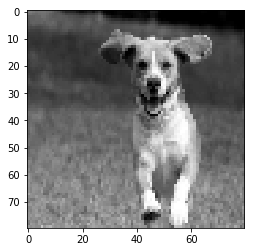

In [77]:
img_array = cv2.imread(r'C:\Users\Orwell\Downloads\dog_test.jpg',cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

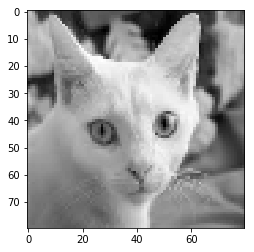

In [73]:
img_array = cv2.imread(r'C:\Users\Orwell\Downloads\cat_1.jpg',cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

In [79]:
int(round(model.predict(new_img_array.reshape(-1,80,80,1)/255)[0][0]))

1

1